In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
### Get quotes

In [2]:
from Finance.Finance import Stocks

symbols = ['aapl', 'goog', 'spy', 'nflx']

stock = Stocks()

quotes = stock.GetQuote(symbols)
print(quotes)

['110.85', '774.97', '220.93', '117.84']


In [62]:
from Finance.Finance import Stocks

stock = Stocks()
stock.CheckZacksLatestSECReportsRepeatedly()



CSBR :     16:21,    CHAMPIONS ONCOLOGY INC 
Symbol                              CSBR
Company           CHAMPIONS ONCOLOGY INC
Report Time                        16:21
Estimate                             NaN
Reported                           -0.05
Surprise                             NaN
Current Price                       1.91
Price % Change                      0.53
Unnamed: 8                           NaN
Name: 7, dtype: object

FSC :     16:36,    FIFTH STREET FINANCE CORP 
Symbol                                  FSC
Company           FIFTH STREET FINANCE CORP
Report Time                           16:36
Estimate                               0.18
Reported                               0.18
Surprise                                NaN
Current Price                           5.9
Price % Change                         1.03
Unnamed: 8                              NaN
Name: 14, dtype: object

OOMA :     16:28,    OOMA INC 
Symbol                OOMA
Company           OOMA INC
Report Ti

KeyboardInterrupt: 

### update stock data

In [3]:
%pylab inline
from Finance.Finance import Stocks
import os

update_data = False
stock = Stocks()

home = os.path.expanduser('~')
companylist_path = os.path.join(home, 'Documents', 'MarketData', 'CompanyNames', 'nasdaqcompanylist.csv')
companyData_path = os.path.join(home, 'Documents', 'MarketData', 'Stocks') ##where to save

stock.SetCompanyListPaths(companylist_path)
stock.SetCompanyDataPath(companyData_path)

company_list = stock.GetComapnyList()

print(company_list[0:30])

if update_data:
    print('Updating: ', '-'*50)
    stock.UpdateStockData()


Populating the interactive namespace from numpy and matplotlib
     Symbol                             Name     MarketCap
193    AAPL                       Apple Inc.  6.091635e+11
118   GOOGL                    Alphabet Inc.  5.526094e+11
117    GOOG                    Alphabet Inc.  5.342110e+11
1875   MSFT            Microsoft Corporation  4.488489e+11
127    AMZN                 Amazon.com, Inc.  3.969465e+11
981      FB                   Facebook, Inc.  3.683484e+11
1488   INTC                Intel Corporation  1.785952e+11
664   CMCSA              Comcast Corporation  1.600005e+11
615    CSCO              Cisco Systems, Inc.  1.590553e+11
161    AMGN                       Amgen Inc.  1.248341e+11
2791    KHC          The Kraft Heinz Company  1.089919e+11
1229   GILD            Gilead Sciences, Inc.  1.044114e+11
2351   QCOM            QUALCOMM Incorporated  1.009449e+11
3043    WBA   Walgreens Boots Alliance, Inc.  8.725644e+10
519    CELG              Celgene Corporation  8.1022

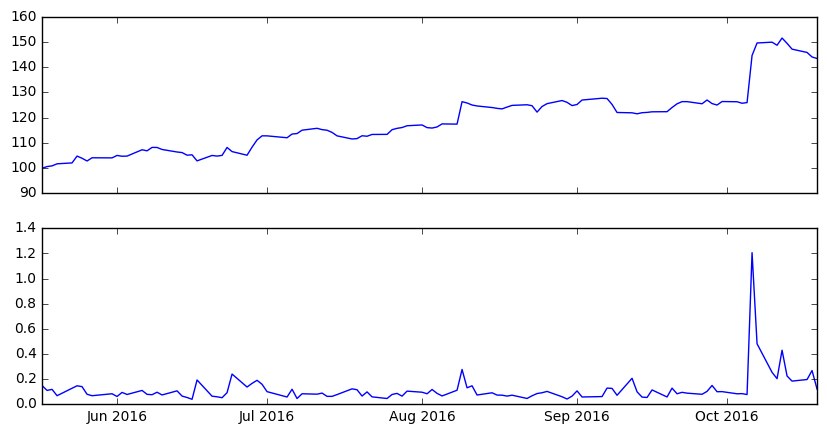

[ 0.56707752]


/home/nima/ipython workspace/Finance/Finance.py:219: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if slopes!=None and len(slopes)>0:


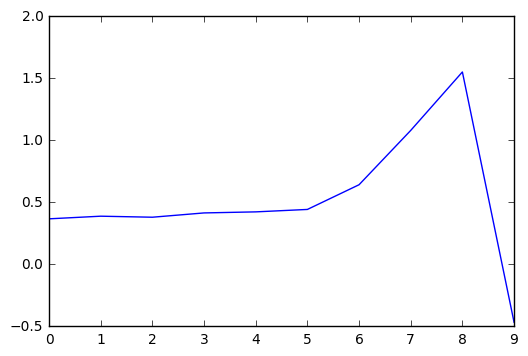

In [4]:
symb = 'ICUI'
stock.plotSymbol(symb, duration=[0.3, 'Y'], window=None, figsize=(10,5), extplt=False, extpltData=[5, 12])

slopes = stock.GetGrowthLinearFit(symb, period=10, duration=[0.3, 'Y'])
plot(slopes)
avg_weighted = stock.GetWeightedAveragedGrowthLinearFit([symb], period=10, duration=[0.3, 'Y'], weightType='linear')
print(avg_weighted)

In [4]:
company_list = stock.GetComapnyList(hasSavedData=True)
symbs = list(company_list.Symbol)

period_set = [1, 5, 10, 20, 30]
n_try =      [5, 10,10, 8, 6 ]
for i in range(len(period_set)):
    period = period_set[i]
    duration_Y = n_try[i]*period/365.0
    avg_weighted = stock.GetWeightedAveragedGrowthLinearFit(symbs, period=period, duration=[duration_Y, 'Y'], \
                                                            weightType='uniform')
    has_value = np.logical_not(np.isnan(avg_weighted))
    avg_weighted = avg_weighted[has_value]
    symbs = np.array(symbs, dtype=object)[has_value]

    index_sorted = np.argsort(avg_weighted)[::-1]

    print('-'*50)
    print('Period :', period)
    print(symbs[index_sorted[0:50]])


/usr/local/lib/python3.5/dist-packages/numpy/polynomial/polynomial.py:1407: RankWarning: The fit may be poorly conditioned
  warnings.warn(msg, pu.RankWarning)
/home/nima/ipython workspace/Finance/Finance.py:219: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if slopes!=None and len(slopes)>0:


--------------------------------------------------
Period : 1
['PCLN' 'GOOG' 'GOOGL' 'NFLX' 'TSLA' 'EQIX' 'PNRA' 'NDSN' 'ILMN' 'SBNY'
 'BWLD' 'CRMT' 'ALGT' 'TCBIW' 'FANG' 'TREE' 'MMYT' 'MSG' 'PEGA' 'LULU'
 'SIVB' 'AFAM' 'EXPE' 'LOGM' 'SAVE' 'FSLR' 'WYNN' 'IAC' 'WIX' 'ASML' 'WINS'
 'COKE' 'HBANP' 'BMLA' 'RGLD' 'MIME' 'PZZA' 'BOKF' 'XOMA' 'FB' 'BABY'
 'CTXS' 'BIIB' 'TBPH' 'MLAB' 'GOLD' 'MELI' 'MNST' 'CBRL' 'LANC']
--------------------------------------------------
Period : 5
['GOOG' 'GOOGL' 'NTES' 'NFLX' 'ALGT' 'IRDMB' 'ISRL' 'TBRA' 'NWLI' 'ICUI'
 'TSRO' 'EXPE' 'PCLN' 'ULTA' 'WINS' 'NXPI' 'AMZN' 'GWPH' 'MMYT' 'CLSD'
 'EQIX' 'FANG' 'CASH' 'SYNA' 'SIVB' 'AFAM' 'ASMB' 'MEOH' 'SAVE' 'XOMA'
 'MRUS' 'AAPL' 'IAC' 'LRCX' 'HAWK' 'FCNCA' 'CLCD' 'MLAB' 'ZBIO' 'ROKA'
 'BIS' 'PCO' 'IRBT' 'FBMS' 'HIFS' 'IPDN' 'DGLD' 'SATS' 'MENT' 'CATM']
--------------------------------------------------
Period : 10
['NTES' 'AMZN' 'PCLN' 'GOOGL' 'GOOG' 'TBRA' 'GWPH' 'TSRO' 'ALGT' 'ICUI'
 'NWLI' 'CLCD' 'ISRL' 'NFLX' 'N

### tests

### yahoo

In [5]:
%pylab inline
from pandas_datareader import data, wb
from pandas import *
import datetime

start = datetime.datetime(2015, 1, 1)
end = datetime.datetime(2016, 9, 30)
df = data.DataReader("ICUI", 'yahoo', start, end)

df.to_hdf('./other/aapl.h5', 'AAPL', format = 'table', mode='w')


Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['slopes']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


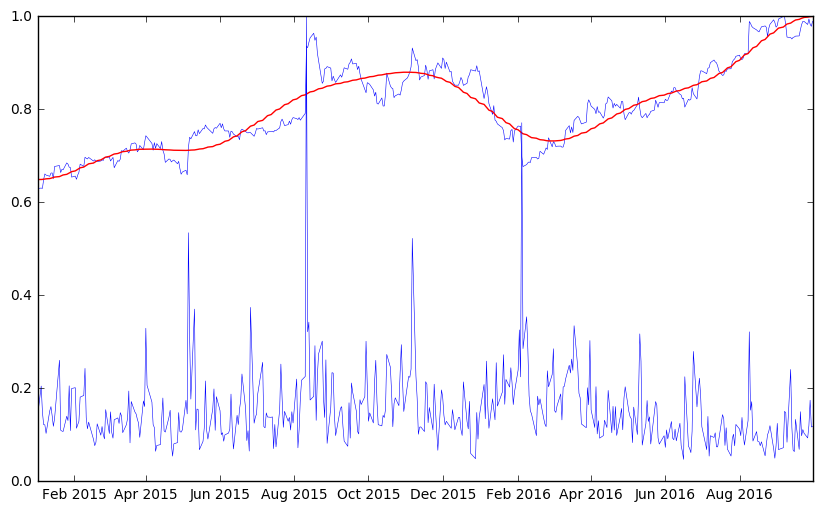

0.154021168398


In [12]:
import numpy as np
import pandas as pd


def filtM(M, title='Close', normalize=True):
    df_close = df[title]

    df_close = np.array(df_close.tolist())
    df_close = np.concatenate((df_close, df_close[::-1]))

    N = len(df_close)
    df_close_FFT = np.fft.fftshift(np.fft.fft(df_close))
    LPfilter = np.ones(N)*np.logical_and(np.arange(N)<int(N/2)+M, np.arange(N)>=int(N/2)-M)
    df_close_FFT = df_close_FFT*LPfilter
    #plot(df_close_FFT[int(N/2)-M:int(N/2)+M])
    #show()

    df_close_Filtered = np.real(np.fft.ifft(np.fft.ifftshift(df_close_FFT))[0:int(N/2)])
    df_close_Filtered = pd.Series(df_close_Filtered, df.index)
    if normalize:
        df_close_Filtered /= np.max(df_close_Filtered)
    return df_close_Filtered

figsize(10,6)

#ax1 = subplot(211)
plot(df.Close/np.max(df.Close), 'b', lw=0.4)
plot(filtM(10), 'r', lw=1)
#show()

#subplot(212, sharex=ax1)
plot(df.Volume/np.max(df.Volume), 'b', lw=0.4)
#plot(filtM(200, 'Volume'), 'r', lw=1)
show()

print((df.Volume/np.max(df.Volume)).mean())

In [11]:
df = read_hdf('./other/aapl.h5', 'AAPL')
print(df.keys())

date_last = df.index[-1]
print(date_last)
start = date_last +  datetime.timedelta(days=1)
end = datetime.date.today()
print(start, ' ---> ', end)

df = data.DataReader("AAPL", 'yahoo', start, end)
df.to_hdf('./other/aapl.h5', 'AAPL', format='table', mode='a', append=True)


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')
2016-09-30 00:00:00
2016-10-01 00:00:00  --->  2016-10-09


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')
2016-10-07 00:00:00


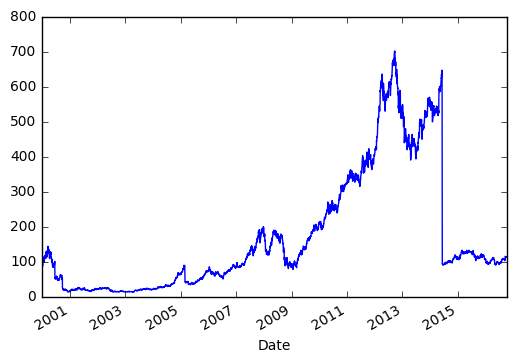

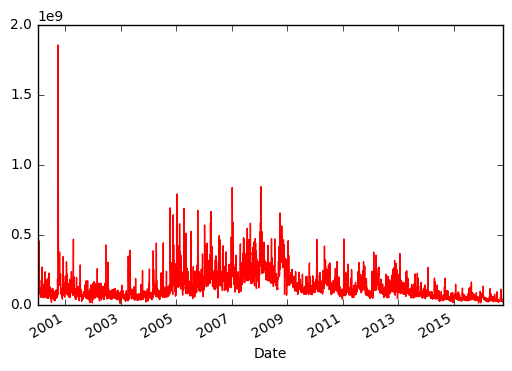

                  Open        High         Low       Close    Volume  \
Date                                                                   
2016-09-26  111.639999  113.389999  111.550003  112.879997  29869400   
2016-09-27  113.000000  113.180000  112.339996  113.089996  24607400   
2016-09-28  113.690002  114.639999  113.430000  113.949997  29641100   
2016-09-29  113.160004  113.800003  111.800003  112.180000  35887000   
2016-09-30  112.459999  113.370003  111.800003  113.050003  36379100   
2016-10-03  112.709999  113.050003  112.279999  112.519997  21701800   
2016-10-04  113.059998  114.309998  112.629997  113.000000  29736800   
2016-10-05  113.400002  113.660004  112.690002  113.050003  21453100   
2016-10-06  113.699997  114.339996  113.129997  113.889999  28779300   
2016-10-07  114.309998  114.559998  113.510002  114.059998  24329900   

             Adj Close  
Date                    
2016-09-26  112.879997  
2016-09-27  113.089996  
2016-09-28  113.949997  
2016-09-29

In [12]:
df = read_hdf('./other/aapl.h5', 'AAPL')
print(df.keys())
date_last = df.index[-1]
print(date_last)


df['Close'].plot(c='b')
show()
df['Volume'].plot(c='r')
show()

print(df[-10:])


In [3]:
import pandas_datareader.data as web

import datetime

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2015, 5, 9)

web.DataReader('AAPL', 'yahoo-actions', start, end)

,action,value
2015-05-07,DIVIDEND,0.520000
2015-02-05,DIVIDEND,0.470000
2014-11-06,DIVIDEND,0.470000
2014-08-07,DIVIDEND,0.470000
2014-06-09,SPLIT,0.142857
2014-05-08,DIVIDEND,0.470000
2014-02-06,DIVIDEND,0.435710
2013-11-06,DIVIDEND,0.435710
2013-08-08,DIVIDEND,0.435710
2013-05-09,DIVIDEND,0.435710


### google finance

In [11]:
import pandas_datareader.data as web

import datetime

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2016, 9, 27)

f = web.DataReader("AAPL", 'google', start, end)

print(f[-10:])


              Open    High     Low   Close     Volume
Date                                                 
2016-09-14  108.73  113.03  108.60  111.77  112340318
2016-09-15  113.86  115.73  113.49  115.57   90613177
2016-09-16  115.12  116.13  114.04  114.92   79886911
2016-09-19  115.19  116.18  113.25  113.58   47023046
2016-09-20  113.05  114.12  112.51  113.57   34514269
2016-09-21  113.85  113.99  112.44  113.55   36003185
2016-09-22  114.35  114.94  114.00  114.62   31073984
2016-09-23  114.42  114.79  111.55  112.71   52481151
2016-09-26  111.64  113.39  111.55  112.88   29869442
2016-09-27  113.00  113.18  112.34  113.09   24607412


### FRED

In [10]:
import pandas_datareader.data as web

import datetime

start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2016, 8, 30)

gdp=web.DataReader("GDP", "fred", start, end)

print("gdp.ix['2013-01-01'] : ")
print(gdp.ix['2014-01-01'])

useuro=web.DataReader("DEXUSEU", "fred", start, end)

print("useuro : ")
print(useuro.head(10))


gold=web.DataReader(["GOLDAMGBD228NLBM", "GOLDPMGBD228NLBM"], "fred", start, end)

print("gold (10AM, 3:00PM): ")
print(gold.head(10))

# Multiple series:
inflation = web.DataReader(["CPIAUCSL", "CPILFESL"], "fred", start, end)

print("inflation : ")
print(inflation.head())

gdp.ix['2013-01-01'] : 
GDP    17025.2
Name: 2014-01-01 00:00:00, dtype: float64
useuro : 
            DEXUSEU
DATE               
2010-01-01      NaN
2010-01-04   1.4419
2010-01-05   1.4402
2010-01-06   1.4404
2010-01-07   1.4314
2010-01-08   1.4357
2010-01-11   1.4536
2010-01-12   1.4523
2010-01-13   1.4492
2010-01-14   1.4478
gold (10AM, 3:00PM): 
            GOLDAMGBD228NLBM  GOLDPMGBD228NLBM
DATE                                          
2010-01-01               NaN               NaN
2010-01-04           1113.00           1121.50
2010-01-05           1125.25           1123.25
2010-01-06           1125.00           1130.00
2010-01-07           1130.75           1130.25
2010-01-08           1121.75           1126.75
2010-01-11           1158.00           1153.00
2010-01-12           1152.75           1151.25
2010-01-13           1132.75           1127.25
2010-01-14           1137.50           1138.25
inflation : 
            CPIAUCSL  CPILFESL
DATE                          
2010-01-

### FAMA/French

In [10]:
import pandas_datareader.data as web

ip=web.DataReader("5_Industry_Portfolios", "famafrench")

print(ip)

{0:          Cnsmr  Manuf  HiTec  Hlth   Other
Date                                      
2010-01  -1.95  -4.02  -7.59   0.00  -1.67
2010-02   3.90   3.23   4.34   0.37   3.38
2010-03   6.35   4.74   6.86   3.61   8.42
2010-04   1.52   3.31   2.45  -2.23   2.16
2010-05  -5.70  -8.88  -7.27  -8.01  -8.83
2010-06  -6.51  -5.19  -5.67  -1.63  -7.65
2010-07   6.44   8.48   7.97   2.15   7.48
2010-08  -3.35  -3.79  -5.49  -1.66  -7.51
2010-09   9.87   8.83  11.40   9.00   8.83
2010-10   3.61   4.33   5.96   2.01   2.58
2010-11   2.89   2.46  -1.07  -3.33   0.51
2010-12   4.12   7.27   6.16   5.41   9.70
2011-01  -1.28   4.25   3.08  -0.71   1.93
2011-02   2.91   4.88   3.38   3.33   2.66
2011-03   1.79   1.73  -0.85   2.29  -0.87
2011-04   4.31   2.47   3.16   6.37   1.10
2011-05   0.83  -2.59  -1.11   1.96  -2.39
2011-06  -0.93  -1.27  -2.15  -1.84  -2.05
2011-07  -1.38  -2.04  -1.36  -3.65  -3.72
2011-08  -2.91  -6.70  -6.53  -3.09  -7.59
2011-09  -5.14 -10.00  -5.08  -3.96 -10.30
2011-10

### World bank

In [11]:
from pandas_datareader import wb

print(wb.search('gdp.*capita.*const').iloc[:,:2])
print("---------------------")
dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX'], start=2005, end=2008)
print(dat)
print("---------------------")
print(dat['NY.GDP.PCAP.KD'].groupby(level=0).mean())
print("---------------------")
print(wb.search('cell.*%').iloc[:,:2])
print("---------------------")
ind = ['NY.GDP.PCAP.KD', 'IT.MOB.COV.ZS']
dat = wb.download(indicator=ind, country='all', start=2011, end=2011).dropna()
dat.columns = ['gdp', 'cellphone']
print(dat.tail())

                      id                                               name
685   6.0.GDPpc_constant  GDP per capita, PPP (constant 2011 internation...
7433      NY.GDP.PCAP.KD                 GDP per capita (constant 2010 US$)
7435      NY.GDP.PCAP.KN                      GDP per capita (constant LCU)
7437   NY.GDP.PCAP.PP.KD  GDP per capita, PPP (constant 2011 internation...
---------------------
                    NY.GDP.PCAP.KD
country       year                
Canada        2008    48508.815279
              2007    48550.942415
              2006    48033.300476
              2005    47179.857911
Mexico        2008     9126.924423
              2007     9146.747106
              2006     9002.539631
              2005     8706.175363
United States 2008    49364.644550
              2007    49979.533843
              2006    49575.401014
              2005    48755.616061
---------------------
country
Canada           48068.229020
Mexico            8995.596631
United States    4

In [4]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

mod = smf.ols("cellphone ~ np.log(gdp)", data=dat).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:              cellphone   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     10.62
Date:                Mon, 23 Mar 2015   Prob (F-statistic):            0.00279
Time:                        18:42:13   Log-Likelihood:                -136.05
No. Observations:                  32   AIC:                             276.1
Df Residuals:                      30   BIC:                             279.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      16.7227     20.970      0.797      

### Fast data mining with pandas

#### series

In [18]:
from pandas import *

s = Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])

print(s.index)
print('mean = ', s.mean())

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
mean =  3.0


In [11]:
from numpy.random import *

x = standard_normal(250)
index = date_range('01/01/2012', periods=len(x))
s = Series(x, index=index)

#print(s)

In [ ]:
datetools.bday

In [15]:
#index = date_range('01/01/2012', periods=len(x), offset=datetools.DateOffset(2))

In [20]:
s = Series(standard_normal(4), index=['1', '2', '3', '5'])
t = Series(standard_normal(4), index=['1', '2', '3', '4'])

df = DataFrame({'s':s, 't':t})

df['sum'] = df['s'] + df['t']

print(df)

print('sum mean: ', df['sum'].mean())

          s         t       sum
1  0.482840 -1.032169 -0.549329
2  0.058499  0.747016  0.805515
3 -0.751936 -1.604339 -2.356275
4       NaN -0.104347       NaN
5 -0.195050       NaN       NaN
sum mean:  -0.700029848414


Populating the interactive namespace from numpy and matplotlib


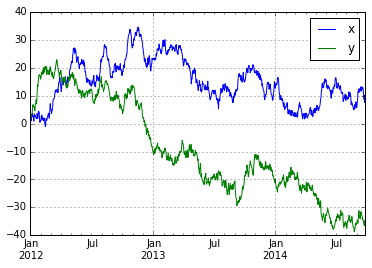

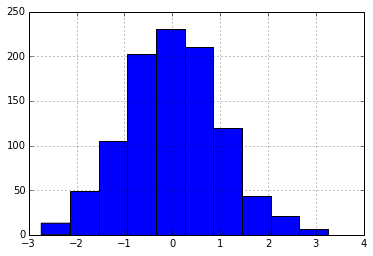

In [26]:
%pylab inline
N = 1000
index = date_range('01/01/2012', periods=N)

x = standard_normal(N)
y = standard_normal(N)

df = DataFrame({'x':x, 'y':y}, index=index)

df.cumsum().plot()
show()

df['x'].hist()
show()

In [15]:
%pylab inline
import numpy as np
from pandas_datareader.data import *

AAPL = DataReader('AAPL', 'yahoo', start='09-01-2014')
AAPL['Ret'] = np.log(AAPL['Close']/AAPL['Close'].shift(1))

print(AAPL[-10:].to_string())

Populating the interactive namespace from numpy and matplotlib
                  Open        High         Low       Close    Volume   Adj Close       Ret
Date                                                                                      
2016-09-19  115.190002  116.180000  113.250000  113.580002  47023000  113.580002 -0.011729
2016-09-20  113.050003  114.120003  112.510002  113.570000  34514300  113.570000 -0.000088
2016-09-21  113.849998  113.989998  112.440002  113.550003  36003200  113.550003 -0.000176
2016-09-22  114.349998  114.940002  114.000000  114.620003  31074000  114.620003  0.009379
2016-09-23  114.419998  114.790001  111.550003  112.709999  52481200  112.709999 -0.016804
2016-09-26  111.639999  113.389999  111.550003  112.879997  29869400  112.879997  0.001507
2016-09-27  113.000000  113.180000  112.339996  113.089996  24607400  113.089996  0.001859
2016-09-28  113.690002  114.639999  113.430000  113.949997  29641100  113.949997  0.007576
2016-09-29  113.160004  113

/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


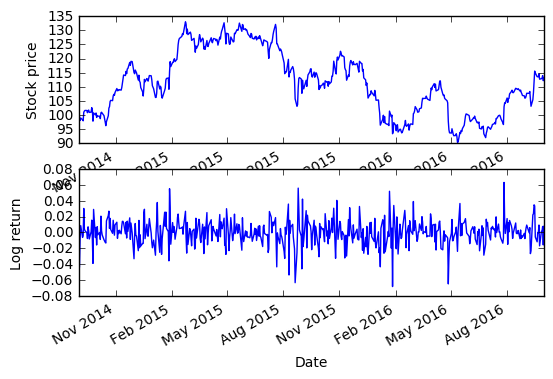

In [16]:
subplot(211)
AAPL['Close'].plot()
ylabel('Stock price')

subplot(212)
AAPL['Ret'].plot()
ylabel('Log return')


In [19]:
h5file = HDFStore('./other/aapl.h5')
h5file['AAPL'] = AAPL
h5file.close()


### intraday stock data

In [23]:
import urllib

#url = 'http://www.netfonds.no/quotes/tradedump.php?date=20150429&paper=%s.O&csv_format=csv'
url = 'http://www.netfonds.no/quotes/posdump.php?date=20160928&paper=%s.FXSX&csv_format=csv'

#urllib.request.urlretrieve(url %'AAPL', './other/aapl.csv')
urllib.request.urlretrieve(url %'EURGBP', './other/aapl.csv')


('./other/aapl.csv', <http.client.HTTPMessage at 0x7f87c62f3470>)

In [21]:
from datetime import datetime

AAPL = read_csv('./other/aapl.csv')
GOOG = read_csv('./other/goog.csv')

#print(AAPL[-10:])
APL = AAPL.drop_duplicates(cols='time')
GOOG = GOOG.drop_duplicates(cols='time')

for i in AAPL.index:
    AAPL['time'][i] = datetime.strptime(AAPL['time'][i], '%Y%m%dT%H%M%S')
AAPL.index = AAPL['time']
del AAPL['time']

for i in GOOG.index:
    GOOG['time'][i] = datetime.strptime(GOOG['time'][i], '%Y%m%dT%H%M%S')
GOOG.index = GOOG['time']
del GOOG['time']



ValueError: No columns to parse from file

In [ ]:
DATA = DataFrame({'AAPL': AAPL['bid'], 'GOOG': GOOG['bid']})

DATA = DATA[DATA.index > datetime(2012, 6, 22, 9, 59, 0)]
            
print(DATA.ix[-20].to_string())
DATA.plot(subplots=True)

In [ ]:
by = lambda x: lambda y: getattr(y, x)

D = DATA.groupby([by('day'), by('hour')]).mean()

print(D)
D.plot()


### list of companies

In [14]:
%pylab inline
import os
import pandas as pd

home = os.path.expanduser('~')
print(home)

file_path = os.path.join(home, 'Documents', 'MarketData', 'CompanyNames', 'nasdaqcompanylist.csv')
company_list = pd.read_csv(file_path)
company_list = company_list.loc[:,['Symbol','Name', 'MarketCap']]
stock_symbols = company_list['Symbol']

marketCap = company_list['MarketCap']

marketCap_min = np.min(marketCap)
marketCap_max = np.max(marketCap)


print('marketCap range: ', [marketCap_min, marketCap_max])

company_list_sorted = company_list.sort_values(by="MarketCap", ascending=False)
print(company_list_sorted[0:50])


Populating the interactive namespace from numpy and matplotlib
/home/nima
marketCap range:  [0.0, 609163481150.0]
     Symbol                                        Name     MarketCap
193    AAPL                                  Apple Inc.  6.091635e+11
118   GOOGL                               Alphabet Inc.  5.526094e+11
117    GOOG                               Alphabet Inc.  5.342110e+11
1875   MSFT                       Microsoft Corporation  4.488489e+11
127    AMZN                            Amazon.com, Inc.  3.969465e+11
981      FB                              Facebook, Inc.  3.683484e+11
1488   INTC                           Intel Corporation  1.785952e+11
664   CMCSA                         Comcast Corporation  1.600005e+11
615    CSCO                         Cisco Systems, Inc.  1.590553e+11
161    AMGN                                  Amgen Inc.  1.248341e+11
2791    KHC                     The Kraft Heinz Company  1.089919e+11
1229   GILD                       Gilead Scien

In [25]:
company_list.loc[0, 'Symbol']

'PIH'

In [26]:
stock_symbols[0]

'PIH'